In [1]:
#kNN Classifier implementation – Load the data

#Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('ggplot')
print("Started")

Started


## Load the dataset
## Examine the contents
## Check the values

In [3]:
#load the dataset
data= pd.read_excel("Plant_Tree_data.xlsx")

#print the first 6 rows from dataframe
data.head(6)

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [4]:
data.dtypes


LeafLength            float64
LeafBreadth           float64
ErrorLeafLength       float64
ErrorLeafBreadth      float64
LeafCurveAngle        float64
EdgeCurvatureAngle    float64
ErrorLeafCurvature    float64
TreeLength            float64
TreeType                int64
dtype: object

In [5]:
data.shape

(17898, 9)

## For X drop the TreeType
## For Y take only Tree Type

In [6]:
X= data.drop('TreeType', axis=1).values
y = data['TreeType'].values

In [7]:
X.shape

(17898, 8)

In [8]:
y.shape

(17898,)

### Check the count of Tree Type classifications
### Count of 0
### Count of 1

In [9]:
print(data.groupby('TreeType').size())

TreeType
0    16259
1     1639
dtype: int64


### Plot the Graph

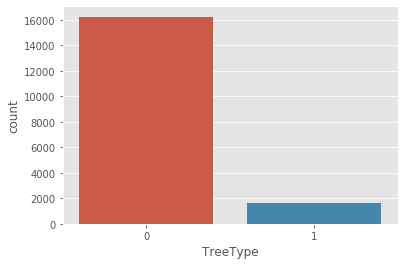

In [10]:
import seaborn as sns
sns.countplot(data['TreeType'],label="Count")

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)
X_train.shape

(10738, 8)

### Use the KNeighborsClassifier model to build the model and get the accuracy
### Plot the Accuracy

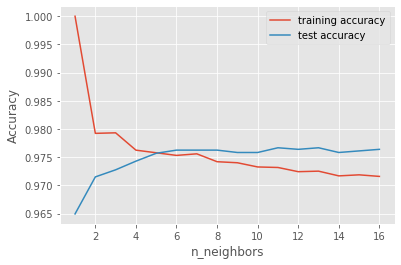

In [12]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 17)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

#kNN Classifier implementation – Plot the accuracy

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

### The Graph meets at optimal value of k=5

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Check the test score 

In [14]:
knn.score(X_test,y_test)

0.9756983240223464

### Check the training score

In [15]:
knn.score(X_train,y_train)


0.9757869249394673

In [16]:
y_pred = knn.predict(X_test)


### Check the Cross tab for Predicted true

In [17]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)


Predicted,0,1,All
True,,,
0,6457,47,6504
1,127,529,656
All,6584,576,7160


### Get the Classification Report and observe values for Precision, Recall, f1-score

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6504
           1       0.92      0.81      0.86       656

    accuracy                           0.98      7160
   macro avg       0.95      0.90      0.92      7160
weighted avg       0.98      0.98      0.97      7160



In [19]:
y_pred_prob = knn.predict_proba(X_test)[:,1]


### From the following - Plot the ROC Curve

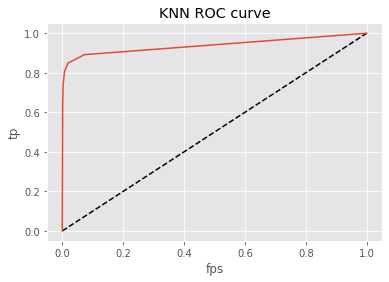

0.9385017287672877

In [20]:
from sklearn.metrics import roc_curve
fps,tp,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fps,tp,label='KNN')
plt.xlabel('fps')
plt.ylabel('tp')
plt.title('KNN ROC curve')
plt.show()


from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob)

### Get the best hyperparameters

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn= KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Get the Best Score

In [23]:
knn_cv.best_score_

0.9729020002234886

### Get the best parameters

In [24]:
knn_cv.best_params_


{'n_neighbors': 12}

### Get the best estimator

In [45]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [44]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.98


## Approach1 - Finding the optimal k using the Elbow method 

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

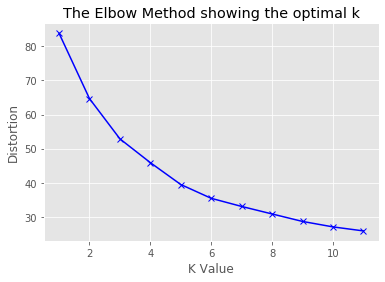

In [38]:
# k means determine k
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('K Value')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Approach 2 - Finding the Optimal K using the Elbow method (MinMaxScalar)

In [29]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [30]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [42]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

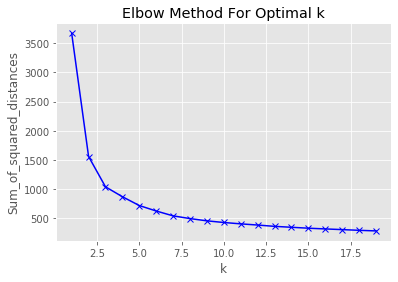

In [43]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [47]:
 !jupyter nbconvert  kNNAssignment1.ipynb

[NbConvertApp] Converting notebook kNNAssignment1.ipynb to html
[NbConvertApp] Writing 428910 bytes to kNNAssignment1.html
